In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
from torchvision import datasets, transforms
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os

In [16]:
def data_loader(train_batch_size, test_batch_size):
    transform = transforms.Compose([
        transforms.Resize((32, 32)),  
        transforms.ToTensor()         
    ])

    train_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=True, download=True, transform=transform),
        batch_size=train_batch_size,
        shuffle=True  
    )

    test_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=False, download=True, transform=transform),
        batch_size=test_batch_size,
        shuffle=False  
    )

    return train_data, test_data

In [17]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.c1 = nn.Conv2d(1, 6, 5)
        self.c2 = nn.Conv2d(6, 16, 5)
        self.l1 = nn.Linear(16 * 5 * 5, 120)
        self.l2 = nn.Linear(120, 84)
        self.l3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.c1(x)), 2)
        x = F.max_pool2d(F.relu(self.c2(x)), 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))

        x = self.l3(x)
        return x

In [18]:
def calculate_parameters(modelName, model):
    param = sum(p.numel() for p in model.parameters())
    print('{}: {}'.format(modelName, param))
    return param

def init_optimizer(model):
    return optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)

In [19]:
def train(model, optimizer, data):
    model.train()
    for batch_idx, (data, target) in enumerate(data):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        output = model(data)
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [20]:
def calculate_ip_op_diff(model, loader):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    loss_fn = torch.nn.CrossEntropyLoss()
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [21]:
epochs=28

def train_models(model, optimizer, train_data, test_data):
    param_arr = []
    train_loss_arr = []
    test_loss_arr = []
    train_accuracy_arr = []
    test_accuracy_arr = []
    total_train_loss = 0
    print('Training model ')
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_data)
        train_loss, train_acc = calculate_ip_op_diff(model, train_data)
        test_loss, test_acc = calculate_ip_op_diff(model, test_data)

        train_loss_arr.append(train_loss)
        test_loss_arr.append(test_loss)
        train_accuracy_arr.append(train_acc)
        test_accuracy_arr.append(test_acc)
#         param_arr.append(calculate_parameters('Model params',  model))
        print('test loss - ', test_loss, ' epoch - ', epoch)
    print('Training completed..')
    return train_loss_arr, test_loss_arr, train_accuracy_arr, test_accuracy_arr, param_arr

In [22]:
train_data, test_data = data_loader(65, 70)

model_1 = Model()
optimizer = init_optimizer(model_1)
train_loss_arr_b1, test_loss_arr_b1, train_accuracy_arr_b1, test_accuracy_arr_b1, param_arr_b1 = train_models(model_1, optimizer, train_data, test_data)

Training model 
test loss -  tensor(0.0931)  epoch -  1
test loss -  tensor(0.0520)  epoch -  2
test loss -  tensor(0.0713)  epoch -  3
test loss -  tensor(0.0395)  epoch -  4
test loss -  tensor(0.0391)  epoch -  5
test loss -  tensor(0.0279)  epoch -  6
test loss -  tensor(0.0283)  epoch -  7
test loss -  tensor(0.0344)  epoch -  8
test loss -  tensor(0.0299)  epoch -  9
test loss -  tensor(0.0310)  epoch -  10
test loss -  tensor(0.0287)  epoch -  11
test loss -  tensor(0.0282)  epoch -  12
test loss -  tensor(0.0330)  epoch -  13
test loss -  tensor(0.0295)  epoch -  14
test loss -  tensor(0.0285)  epoch -  15
test loss -  tensor(0.0436)  epoch -  16
test loss -  tensor(0.0333)  epoch -  17
test loss -  tensor(0.0353)  epoch -  18
test loss -  tensor(0.0455)  epoch -  19
test loss -  tensor(0.0306)  epoch -  20
test loss -  tensor(0.0312)  epoch -  21
test loss -  tensor(0.0318)  epoch -  22
test loss -  tensor(0.0374)  epoch -  23
test loss -  tensor(0.0320)  epoch -  24
test loss

In [23]:
train_data, test_data = data_loader(450, 450)

model_2 = Model()
optimizer = init_optimizer(model_2)
train_loss_arr_b2, test_loss_arr_b2, train_accuracy_arr_b2, test_accuracy_arr_b2, param_arr_b2 = train_models(model_2, optimizer, train_data, test_data)

Training model 
test loss -  tensor(2.2611)  epoch -  1
test loss -  tensor(0.3577)  epoch -  2
test loss -  tensor(0.1608)  epoch -  3
test loss -  tensor(0.1011)  epoch -  4
test loss -  tensor(0.0913)  epoch -  5
test loss -  tensor(0.0705)  epoch -  6
test loss -  tensor(0.0693)  epoch -  7
test loss -  tensor(0.0637)  epoch -  8
test loss -  tensor(0.0574)  epoch -  9
test loss -  tensor(0.0542)  epoch -  10
test loss -  tensor(0.0580)  epoch -  11
test loss -  tensor(0.0557)  epoch -  12
test loss -  tensor(0.0579)  epoch -  13
test loss -  tensor(0.0441)  epoch -  14
test loss -  tensor(0.0396)  epoch -  15
test loss -  tensor(0.0370)  epoch -  16
test loss -  tensor(0.0400)  epoch -  17
test loss -  tensor(0.0356)  epoch -  18
test loss -  tensor(0.0433)  epoch -  19
test loss -  tensor(0.0354)  epoch -  20
test loss -  tensor(0.0364)  epoch -  21
test loss -  tensor(0.0352)  epoch -  22
test loss -  tensor(0.0352)  epoch -  23
test loss -  tensor(0.0339)  epoch -  24
test loss

In [24]:
param_b1 = torch.nn.utils.parameters_to_vector(model_1.parameters())
param_b2 = torch.nn.utils.parameters_to_vector(model_2.parameters())

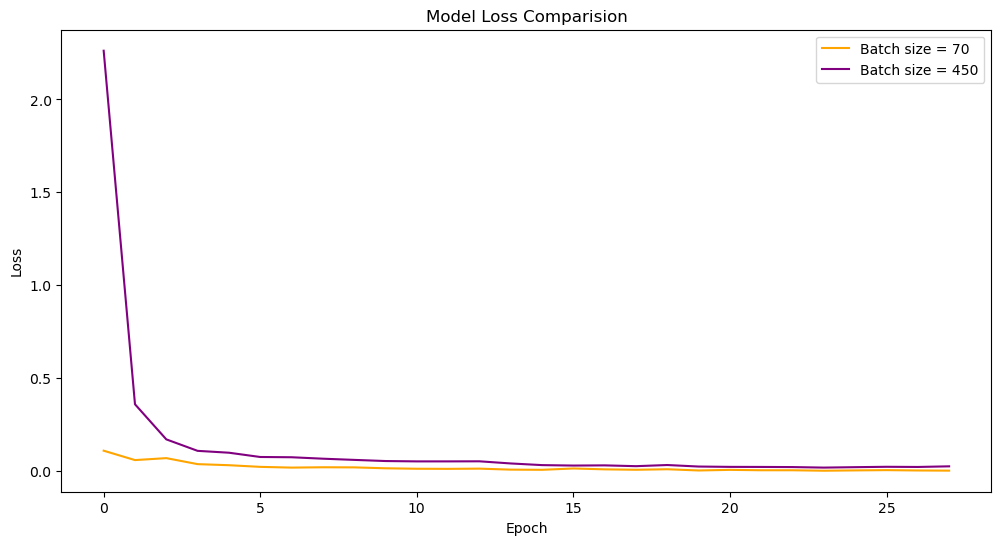

In [30]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 28, 1), train_loss_arr_b1, color = "orange")
plt.plot(np.arange(0, 28, 1), train_loss_arr_b2, color = "purple")
plt.title('Model Loss Comparision')
plt.legend(['Batch size = 70', 'Batch size = 450'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [31]:
def data_loader(train_batch_size, test_batch_size):
    train_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor()
                       ])),
        batch_size = train_batch_size, shuffle=True)

    test_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor()
        ])),
        batch_size = test_batch_size, shuffle=True)

    return (train_data, test_data)

In [32]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.c1 = nn.Conv2d(1, 6, 5)
        self.c2 = nn.Conv2d(6, 16, 5)
        self.l1 = nn.Linear(16 * 5 * 5, 120)
        self.l2 = nn.Linear(120, 84)
        self.l3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.c1(x)), 2)
        x = F.max_pool2d(F.relu(self.c2(x)), 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))

        x = self.l3(x)
        return x

In [33]:
def calculate_parameters(modelName, model):
    param = sum(p.numel() for p in model.parameters())
    print('{}: {}'.format(modelName, param))
    return param

In [34]:

def init_optimizer(model):
    return optim.SGD(model.parameters(), lr=1e-3, momentum=0.9, nesterov=True)

In [35]:
def train(model, optimizer, data):
    model.train()
    for batch_idx, (data, target) in enumerate(data):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        output = model(data)
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [36]:
def calculate_ip_op_diff(model, loader):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    loss_fn = torch.nn.CrossEntropyLoss()
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [37]:
epochs=28

def train_models(model, optimizer, train_data, test_data):
    param_arr = []
    train_loss_arr = []
    test_loss_arr = []
    train_accuracy_arr = []
    test_accuracy_arr = []
    total_train_loss = 0
    print('Training model ')
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_data)
        train_loss, train_acc = calculate_ip_op_diff(model, train_data)
        test_loss, test_acc = calculate_ip_op_diff(model, test_data)

        train_loss_arr.append(train_loss)
        test_loss_arr.append(test_loss)
        train_accuracy_arr.append(train_acc)
        test_accuracy_arr.append(test_acc)
#         param_arr.append(calculate_parameters('Model params',  model))
        print('test loss - ', test_loss, ' epoch - ', epoch)
    print('Training completed..')
    return train_loss_arr, test_loss_arr, train_accuracy_arr, test_accuracy_arr, param_arr

In [39]:
train_data, test_data = data_loader(65, 65)

model_1 = Model()
optimizer = init_optimizer(model_1)
train_loss_arr_b1, test_loss_arr_b1, train_accuracy_arr_b1, test_accuracy_arr_b1, param_arr_b1 = train_models(model_1, optimizer, train_data, test_data)

Training model 
test loss -  tensor(2.2871)  epoch -  1
test loss -  tensor(0.4492)  epoch -  2
test loss -  tensor(0.2219)  epoch -  3
test loss -  tensor(0.1403)  epoch -  4
test loss -  tensor(0.1059)  epoch -  5
test loss -  tensor(0.1093)  epoch -  6
test loss -  tensor(0.0845)  epoch -  7
test loss -  tensor(0.0727)  epoch -  8
test loss -  tensor(0.0688)  epoch -  9
test loss -  tensor(0.0721)  epoch -  10
test loss -  tensor(0.0600)  epoch -  11
test loss -  tensor(0.0586)  epoch -  12
test loss -  tensor(0.0518)  epoch -  13
test loss -  tensor(0.0498)  epoch -  14
test loss -  tensor(0.0527)  epoch -  15
test loss -  tensor(0.0509)  epoch -  16
test loss -  tensor(0.0501)  epoch -  17
test loss -  tensor(0.0519)  epoch -  18
test loss -  tensor(0.0491)  epoch -  19
test loss -  tensor(0.0537)  epoch -  20
test loss -  tensor(0.0535)  epoch -  21
test loss -  tensor(0.0450)  epoch -  22
test loss -  tensor(0.0453)  epoch -  23
test loss -  tensor(0.0397)  epoch -  24
test loss

In [40]:
train_data, test_data = data_loader(450, 450)

model_2 = Model()
optimizer = init_optimizer(model_2)
train_loss_arr_b2, test_loss_arr_b2, train_accuracy_arr_b2, test_accuracy_arr_b2, param_arr_b2 = train_models(model_2, optimizer, train_data, test_data)

Training model 
test loss -  tensor(2.2961)  epoch -  1
test loss -  tensor(2.2853)  epoch -  2
test loss -  tensor(2.2629)  epoch -  3
test loss -  tensor(2.1781)  epoch -  4
test loss -  tensor(1.5672)  epoch -  5
test loss -  tensor(0.6786)  epoch -  6
test loss -  tensor(0.4890)  epoch -  7
test loss -  tensor(0.4109)  epoch -  8
test loss -  tensor(0.3651)  epoch -  9
test loss -  tensor(0.3255)  epoch -  10
test loss -  tensor(0.2945)  epoch -  11
test loss -  tensor(0.2652)  epoch -  12
test loss -  tensor(0.2456)  epoch -  13
test loss -  tensor(0.2272)  epoch -  14
test loss -  tensor(0.2080)  epoch -  15
test loss -  tensor(0.1921)  epoch -  16
test loss -  tensor(0.1795)  epoch -  17
test loss -  tensor(0.1723)  epoch -  18
test loss -  tensor(0.1599)  epoch -  19
test loss -  tensor(0.1488)  epoch -  20
test loss -  tensor(0.1367)  epoch -  21
test loss -  tensor(0.1364)  epoch -  22
test loss -  tensor(0.1333)  epoch -  23
test loss -  tensor(0.1208)  epoch -  24
test loss

In [41]:
param_b1 = torch.nn.utils.parameters_to_vector(model_1.parameters())
param_b2 = torch.nn.utils.parameters_to_vector(model_2.parameters())

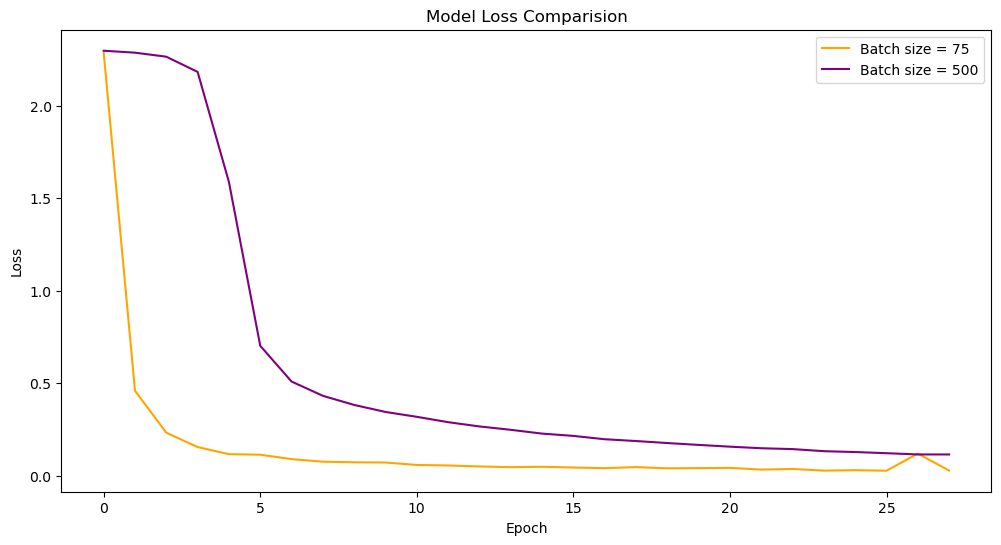

In [42]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 28, 1), train_loss_arr_b1, color = "orange")
plt.plot(np.arange(0, 28, 1), train_loss_arr_b2, color = "purple")
plt.title('Model Loss Comparision')
plt.legend(['Batch size = 75', 'Batch size = 500'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

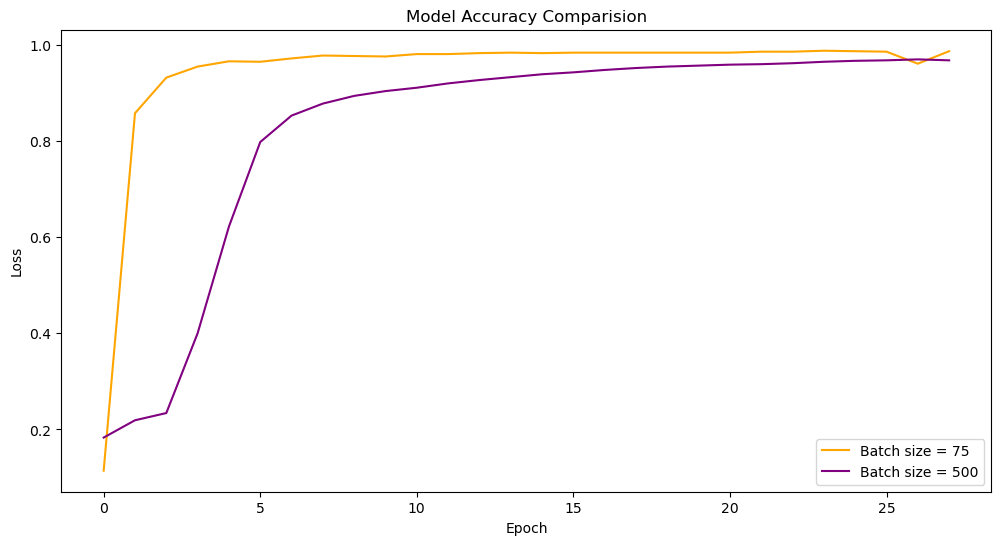

In [43]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 28, 1), test_accuracy_arr_b1, color = "orange")
plt.plot(np.arange(0, 28, 1), test_accuracy_arr_b2, color = "purple")
plt.title('Model Accuracy Comparision')
plt.legend(['Batch size = 75', 'Batch size = 500'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [44]:
alpha = np.arange(-2, 2, 0.2)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*param_b1 + alpha[i]* param_b2
    thetaArr.append(theta)

In [45]:
alpha_train_loss_arr = []
alpha_test_loss_arr = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []

for i in range (len(thetaArr)):
#     torch.manual_seed(1)
    print('Running for theta - ' , i)
    theta = (1-alpha[i])* param_b1 + alpha[i]*param_b2
    model = Model()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()

    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    alpha_train_loss, alpha_train_acc = calculate_ip_op_diff(model, train_data)
    alpha_test_loss, alpha_test_acc = calculate_ip_op_diff(model, test_data)
    print('Alpha loss - ' , alpha_test_loss)
    alpha_train_loss_arr.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_loss_arr.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)

Running for theta -  0
Alpha loss -  tensor(26.6044)
Running for theta -  1
Alpha loss -  tensor(16.6871)
Running for theta -  2
Alpha loss -  tensor(10.5195)
Running for theta -  3
Alpha loss -  tensor(6.4280)
Running for theta -  4
Alpha loss -  tensor(3.5838)
Running for theta -  5
Alpha loss -  tensor(2.0926)
Running for theta -  6
Alpha loss -  tensor(0.9685)
Running for theta -  7
Alpha loss -  tensor(0.4443)
Running for theta -  8
Alpha loss -  tensor(0.1892)
Running for theta -  9
Alpha loss -  tensor(0.0803)
Running for theta -  10
Alpha loss -  tensor(0.0434)
Running for theta -  11
Alpha loss -  tensor(0.1628)
Running for theta -  12
Alpha loss -  tensor(1.1082)
Running for theta -  13
Alpha loss -  tensor(1.4664)
Running for theta -  14
Alpha loss -  tensor(0.4594)
Running for theta -  15
Alpha loss -  tensor(0.1116)
Running for theta -  16
Alpha loss -  tensor(0.1672)
Running for theta -  17
Alpha loss -  tensor(0.6060)
Running for theta -  18
Alpha loss -  tensor(2.2299)


Text(0, 0.5, 'Loss')

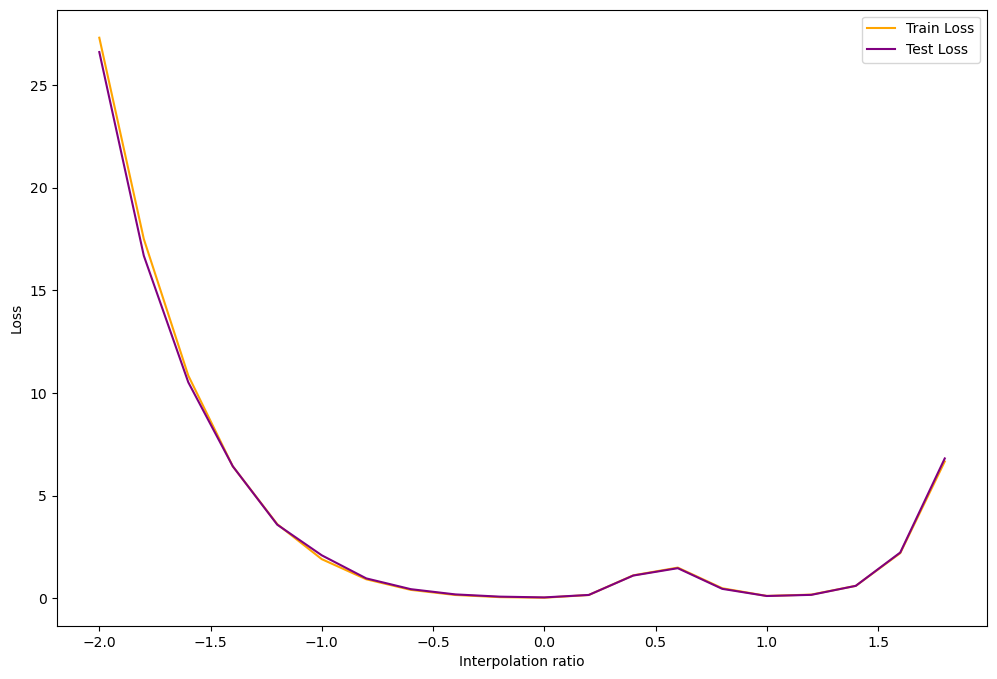

In [46]:
plt.figure(figsize=(12,8))
plt.plot(alpha, alpha_train_loss_arr, color = "orange")
plt.plot(alpha, alpha_test_loss_arr, color = "purple")
# plt.legend(loc='upper left')
plt.legend(['Train Loss' , 'Test Loss'])
plt.xlabel('Interpolation ratio')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

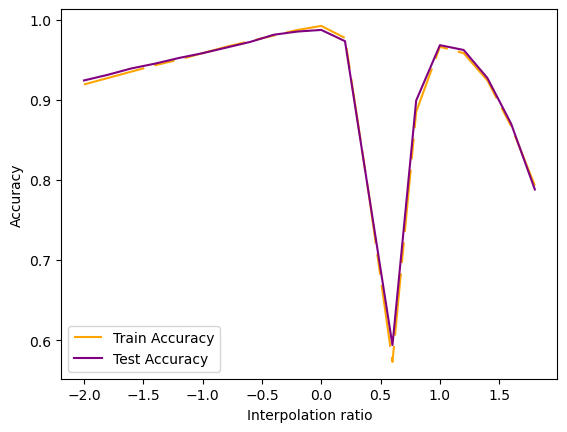

In [47]:
plt.plot(alpha, alpha_train_acc_arr, dashes=[30, 5, 10, 5], color = "orange")
plt.plot(alpha, alpha_test_acc_arr, color = "purple")
plt.legend(['Train Accuracy' , 'Test Accuracy'])
plt.xlabel('Interpolation ratio')
plt.ylabel('Accuracy')

In [48]:
def data_loader(train_batch_size, test_batch_size):
    train_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor()
                       ])),
        batch_size = train_batch_size, shuffle=True)

    test_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor()
        ])),
        batch_size = test_batch_size, shuffle=True)

    return (train_data, test_data)

In [49]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.linear1 = nn.Linear(16 * 5 * 5, 120)
        self.linear2 = nn.Linear(120, 84)
        self.linear3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))

        x = self.linear3(x)
        return x

In [50]:
def sensitivity(model):
    fNormTotal = 0
    counter = 0
    for p in model.parameters():
        grad = 0.0
        if p.grad is not None:
            grad = p.grad
            fNorm = torch.linalg.norm(grad).numpy()
            fNormTotal += fNorm
            counter += 1
    return fNormTotal / counter

In [51]:
def init_optimizer(model):
    return optim.SGD(model.parameters(), lr=1e-2)

In [52]:
def train(model, optimizer, data):
    model.train()
    for batch_idx, (data, target) in enumerate(data):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        output = model(data)
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [53]:
def calculate_op_diff(model, loader):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    loss_fn = torch.nn.CrossEntropyLoss()
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [54]:
epochs=40
param_arr = []
train_loss_arr = []
test_loss_arr = []
train_accuracy_arr = []
test_accuracy_arr = []

def train_models(model, optimizer, train_data, test_data):
    total_train_loss = 0
    print('Training model ')
    for epoch in range(1, epochs + 1):
        print('Training epoch - ' , epoch)
        train(model, optimizer, train_data)
    train_loss, train_acc = calculate_op_diff(model, train_data)
    test_loss, test_acc = calculate_op_diff(model, test_data)

    train_loss_arr.append(train_loss)
    test_loss_arr.append(test_loss)
    train_accuracy_arr.append(train_acc)
    test_accuracy_arr.append(test_acc)
#         param_arr.append(calculate_parameters('Model params',  model))
    print('test loss - ', test_loss, ' epoch - ', epoch)
    print('Training completed..')
#     return train_loss_arr, test_loss_arr, train_accuracy_arr, test_accuracy_arr, param_arr

In [55]:
batch_arr = [150, 250, 750, 4000, 8000]
sensitivity_arr= []
for batch in batch_arr:
    train_data, test_data = data_loader(batch, batch)
    model = Model()
    optimizer = init_optimizer(model)
    train_models(model, optimizer, train_data, test_data)
    sensitivity_arr.append(sensitivity(model))

Training model 
Training epoch -  1
Training epoch -  2
Training epoch -  3
Training epoch -  4
Training epoch -  5
Training epoch -  6
Training epoch -  7
Training epoch -  8
Training epoch -  9
Training epoch -  10
Training epoch -  11
Training epoch -  12
Training epoch -  13
Training epoch -  14
Training epoch -  15
Training epoch -  16
Training epoch -  17
Training epoch -  18
Training epoch -  19
Training epoch -  20
Training epoch -  21
Training epoch -  22
Training epoch -  23
Training epoch -  24
Training epoch -  25
Training epoch -  26
Training epoch -  27
Training epoch -  28
Training epoch -  29
Training epoch -  30
Training epoch -  31
Training epoch -  32
Training epoch -  33
Training epoch -  34
Training epoch -  35
Training epoch -  36
Training epoch -  37
Training epoch -  38
Training epoch -  39
Training epoch -  40
test loss -  tensor(0.0434)  epoch -  40
Training completed..
Training model 
Training epoch -  1
Training epoch -  2
Training epoch -  3
Training epoch 

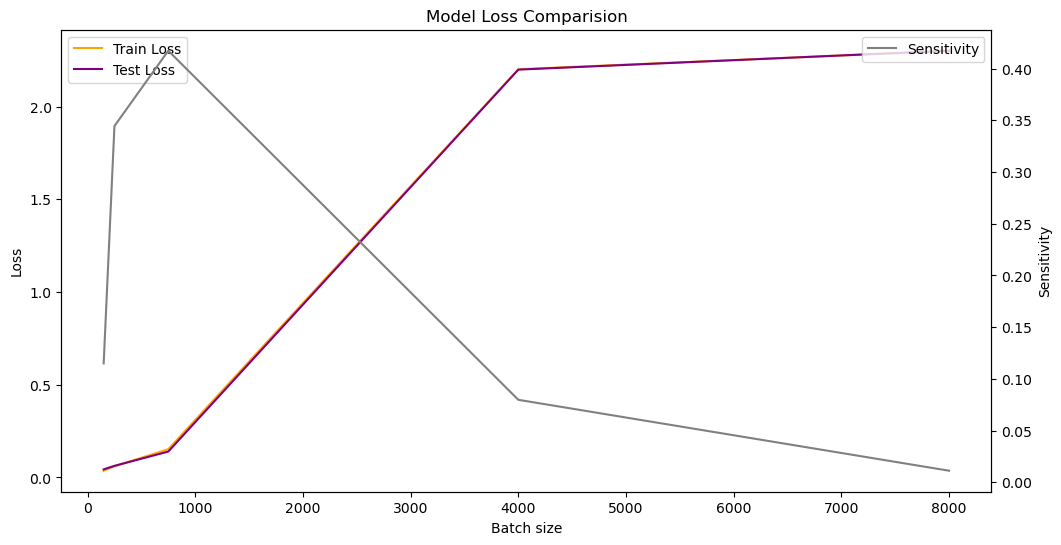

In [56]:
plt.figure(figsize=(12,6))
plt.plot(batch_arr, train_loss_arr, color = "orange")
plt.plot(batch_arr, test_loss_arr, color = "purple")
plt.xlabel('Batch size')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Test Loss'])

ax2 = plt.twinx()

plt.plot(batch_arr, sensitivity_arr, color = "grey")
plt.title('Model Loss Comparision')
plt.legend(['Sensitivity'])
plt.ylabel('Sensitivity')
plt.show()

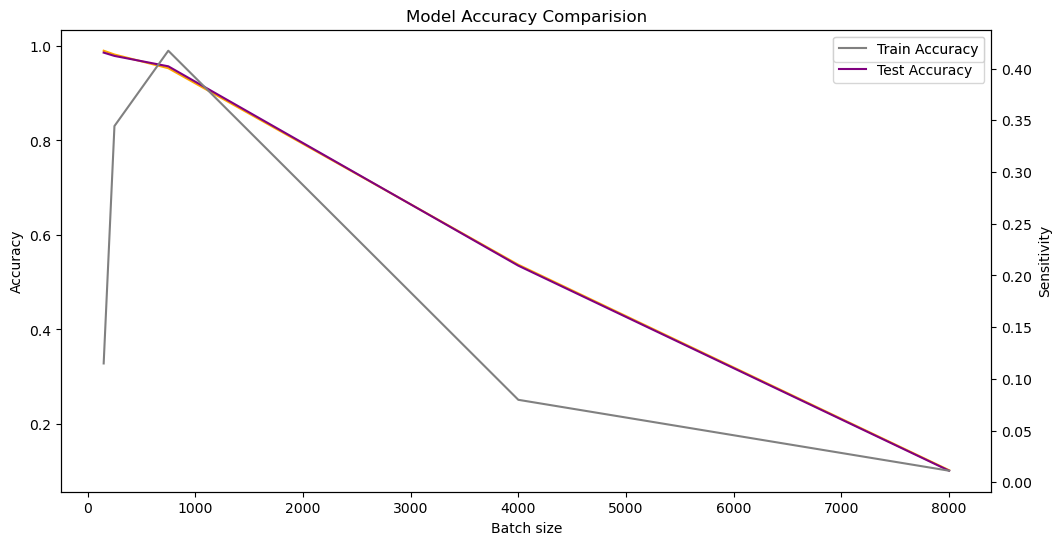

In [57]:
plt.figure(figsize=(12,6))
plt.plot(batch_arr, train_accuracy_arr, color = "orange")
plt.plot(batch_arr, test_accuracy_arr, color = "purple")
plt.xlabel('Batch size')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Test Accuracy'])

ax2 = plt.twinx()

plt.plot(batch_arr, sensitivity_arr, color = "grey")
plt.title('Model Accuracy Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy', 'Sensitivity'])
plt.ylabel('Sensitivity')
plt.show()

In [58]:
def load_data(train_size, test_size):
        trainset = datasets.MNIST('data', train = True, download = False, 
                transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
                ]))
        train_data = torch.utils.data.DataLoader(trainset, batch_size=train_size, shuffle=True)
        
        testset = datasets.MNIST('data', train = False, download = False, 
                transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
                ]))
        test_data =  torch.utils.data.DataLoader(testset, batch_size=test_size, shuffle=True)
        
        return (train_data, test_data)

In [59]:
class Model_1 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 5)
        self.linear2 = nn.Linear(5, 9)
        self.linear3 = nn.Linear(9, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

class Model_2 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 25)
        self.linear2 = nn.Linear(25, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
class Model_3 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 45)
        self.linear2 = nn.Linear(45, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
class Model_4 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 65)
        self.linear2 = nn.Linear(65, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
class Model_5 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 85)
        self.linear2 = nn.Linear(85, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
class Model_6 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 105)
        self.linear2 = nn.Linear(105, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

class Model_7 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 125)
        self.linear2 = nn.Linear(125, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
class Model_8 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 145)
        self.linear2 = nn.Linear(145, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
class Model_9 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 165)
        self.linear2 = nn.Linear(165, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x
    
class Model_10 (nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(784, 185)
        self.linear2 = nn.Linear(185, 8)
        self.linear3 = nn.Linear(8, 10)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [60]:
def calculate_parameters(modelName, model):
    param = sum(p.numel() for p in model.parameters())
    print('{}: {}'.format(modelName, param))
    return param

In [61]:
train_batch_size = 50
test_batch_size = 100
train_data, test_data = load_data(train_batch_size, test_batch_size)

In [62]:
def initiliase_optimizer(model):
    return optim.Adam(model.parameters(), lr = 0.0001)

In [63]:
def train(model, optimizer, data):
    model.train()
    for batch_idx, (data, target) in enumerate(data):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        output = model(data.view(-1, 784))
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [64]:
def calculate_op_diff(model, loader):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    loss_fn = torch.nn.CrossEntropyLoss()
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data.view(-1, 784))
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [65]:
epochs=8
param_arr = []
train_loss_arr = []
test_loss_arr = []
train_accuracy_arr = []
test_accuracy_arr = []

def train_models(model, optimizer, train_data, test_data):
    total_train_loss = 0
    print('Training model ')
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_data)
    train_loss, train_acc = calculate_op_diff(model, train_data)
    test_loss, test_acc = calculate_op_diff(model, test_data)
        
    train_loss_arr.append(train_loss)
    test_loss_arr.append(test_loss)
    train_accuracy_arr.append(train_acc)
    test_accuracy_arr.append(test_acc)
    param_arr.append(calculate_parameters('Model params',  model))
    print('Training completed - ' , train_loss)
    print('test loss - ', test_loss)
    return train_loss, test_loss

In [66]:
loss_arr = []
test_loss_arr = []

In [67]:
model1 = Model_1()
# print("Model 1 parameters: ", (calculate_parameters(model1)))
optimizer = initiliase_optimizer(model1)
print('Model 1')
train_models(model1, optimizer, train_data, test_data)

Model 1
Training model 
Model params: 4079
Training completed -  tensor(0.5044)
test loss -  tensor(0.4876)


(tensor(0.5044), tensor(0.4876))

In [68]:
model1 = Model_3()
# print("Model 1 parameters: ", (calculate_parameters(model1)))
optimizer = initiliase_optimizer(model1)
print('Model 3')
loss = train_models(model1, optimizer, train_data, test_data)

Model 3
Training model 
Model params: 35783
Training completed -  tensor(0.2051)
test loss -  tensor(0.2096)


In [69]:
model1 = Model_4()
# print("Model 1 parameters: ", (calculate_parameters(model1)))
optimizer = initiliase_optimizer(model1)
print('Model 4')
loss = train_models(model1, optimizer, train_data, test_data)

Model 4
Training model 
Model params: 51643
Training completed -  tensor(0.1745)
test loss -  tensor(0.1825)


In [70]:
model1 = Model_5()
# print("Model 1 parameters: ", (calculate_parameters(model1)))
optimizer = initiliase_optimizer(model1)
print('Model 5')
loss = train_models(model1, optimizer, train_data, test_data)

Model 5
Training model 
Model params: 67503
Training completed -  tensor(0.1600)
test loss -  tensor(0.1691)


In [71]:

model1 = Model_6()
# print("Model 1 parameters: ", (calculate_parameters(model1)))
optimizer = initiliase_optimizer(model1)
print('Model 6')
loss = train_models(model1, optimizer, train_data, test_data)

Model 6
Training model 
Model params: 83363
Training completed -  tensor(0.1454)
test loss -  tensor(0.1552)


In [72]:
model1 = Model_7()
# print("Model 1 parameters: ", (calculate_parameters(model1)))
optimizer = initiliase_optimizer(model1)
print('Model 7')
loss = train_models(model1, optimizer, train_data, test_data)

Model 7
Training model 
Model params: 99223
Training completed -  tensor(0.1341)
test loss -  tensor(0.1523)


In [73]:
model1 = Model_8()
# print("Model 1 parameters: ", (calculate_parameters(model1)))
optimizer = initiliase_optimizer(model1)
print('Model 8')
loss = train_models(model1, optimizer, train_data, test_data)

Model 8
Training model 
Model params: 115083
Training completed -  tensor(0.1489)
test loss -  tensor(0.1626)


In [74]:
model1 = Model_9()
# print("Model 1 parameters: ", (calculate_parameters(model1)))
optimizer = initiliase_optimizer(model1)
print('Model 9')
loss = train_models(model1, optimizer, train_data, test_data)

Model 9
Training model 
Model params: 130943
Training completed -  tensor(0.1197)
test loss -  tensor(0.1368)


In [75]:

model1 = Model_10()
# print("Model 1 parameters: ", (calculate_parameters(model1)))
optimizer = initiliase_optimizer(model1)
print('Model 10')
loss = train_models(model1, optimizer, train_data, test_data)

Model 10
Training model 
Model params: 146803
Training completed -  tensor(0.1055)
test loss -  tensor(0.1266)


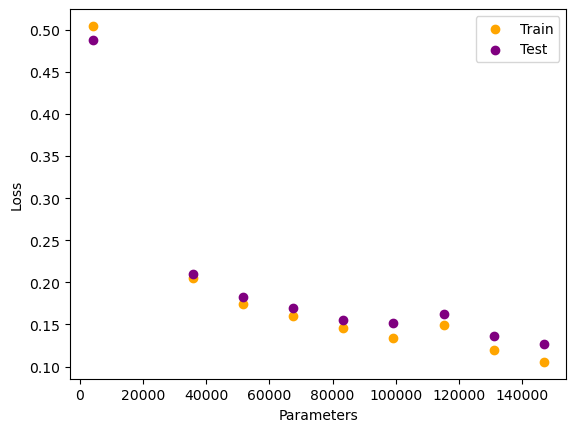

In [76]:
plt.xlabel('Parameters')
plt.ylabel('Loss')
plt.scatter(param_arr,train_loss_arr,  color = "orange")
plt.scatter(param_arr,test_loss_arr,  color = "purple")
plt.legend(['Train', 'Test'])
plt.show()

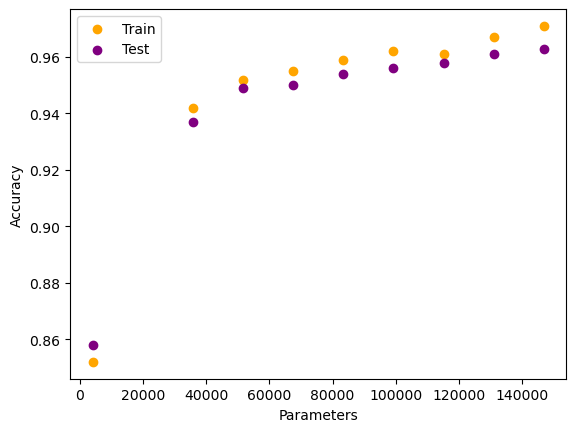

In [77]:
plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.scatter(param_arr,train_accuracy_arr,  color = "orange")
plt.scatter(param_arr,test_accuracy_arr,  color = "purple")
plt.legend(['Train', 'Test'])
plt.show()

In [78]:
transforms= transforms.Compose([
                transforms.Resize((32, 32)),
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
                ])

In [79]:
def load_assign_rand_labels(training_size, testing_size):
    trainset = datasets.MNIST('data', train = True, download = False, 
                transform = transforms)
    # Assign random labels to the images
    trainset.targets = torch.tensor(np.random.randint(0, 10, (len(trainset)),))
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=training_size, shuffle=True)

    testset = datasets.MNIST('data', train = False, 
                transform = transforms)
    test_loader = torch.utils.data.DataLoader(testset ,batch_size = testing_size, shuffle=True)

    return (train_loader, test_loader)

In [80]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.c1 = nn.Conv2d(1, 5, 5)
        self.c2 = nn.Conv2d(5, 16, 5)
        self.l1 = nn.Linear(16 * 5 * 5, 100)
        self.l2 = nn.Linear(100, 84)
        self.l3 = nn.Linear(84, 10)
    def forward(self, x):
        x = F.relu(self.c1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.c2(x))
        x = F.max_pool2d(x, 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))

        x = self.l3(x)
        return x

In [81]:
training_size = 100
testing_size = 100
train_loader, test_loader = load_assign_rand_labels(training_size, testing_size)

In [82]:
def train_func(model, optimizer, train_data):
    model.train()
    correct = 0
    train_loss = 0
    counter = 0

    for batch_idx, (data, target) in enumerate(train_data):
        counter += 1
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.data

        pred = np.argmax(output.data, axis=1)
        correct += np.equal(pred, target.data).sum()
    
    train_loss = (train_loss * 100) / len(train_data.dataset)
    accuracy = 100.0 * correct / len(train_data.dataset)
    return train_loss, accuracy

In [83]:
def test_func(model, epoch, test_data):
    model.eval()
    test_loss = 0
    correct = 0

    for data, target in test_data:
        data, target = Variable(data), Variable(target)
        
        output = model(data)
        loss = loss_fn(output, target)
        test_loss += loss.data

        pred = np.argmax(output.data, axis = 1)
        correct = correct + np.equal(pred, target.data).sum()

    test_loss = (test_loss * 100) / len(test_loader.dataset)
    print('\nTest set, Epoch {} , Average loss: {:.4f}, Accuracy: {:.0f}%\n'.format(epoch, test_loss,
        100. * correct / len(test_data.dataset)))
    return test_loss

In [84]:
model = Model()

optimizer = optim.Adam(model.parameters(), lr=0.0001)
train_loss_arr = []
test_loss_arr = []
epoch_arr = []

epochs = 100
# log_interval = 500
loss_fn = torch.nn.CrossEntropyLoss()

for epoch in range(1, epochs + 1):
    print('Training epoch - ', epoch)
    tr_loss, acc = train_func(model, optimizer, train_loader)
    train_loss_arr.append(tr_loss)
    loss_test = test_func(model, epoch, test_loader)
    test_loss_arr.append(loss_test)
    epoch_arr.append(epoch)

Training epoch -  1

Test set, Epoch 1 , Average loss: 2.3016, Accuracy: 17%

Training epoch -  2

Test set, Epoch 2 , Average loss: 2.3008, Accuracy: 9%

Training epoch -  3

Test set, Epoch 3 , Average loss: 2.3010, Accuracy: 5%

Training epoch -  4

Test set, Epoch 4 , Average loss: 2.2953, Accuracy: 12%

Training epoch -  5

Test set, Epoch 5 , Average loss: 2.2987, Accuracy: 9%

Training epoch -  6

Test set, Epoch 6 , Average loss: 2.3004, Accuracy: 13%

Training epoch -  7

Test set, Epoch 7 , Average loss: 2.3043, Accuracy: 9%

Training epoch -  8

Test set, Epoch 8 , Average loss: 2.3071, Accuracy: 7%

Training epoch -  9

Test set, Epoch 9 , Average loss: 2.3056, Accuracy: 11%

Training epoch -  10

Test set, Epoch 10 , Average loss: 2.3066, Accuracy: 10%

Training epoch -  11

Test set, Epoch 11 , Average loss: 2.3103, Accuracy: 8%

Training epoch -  12

Test set, Epoch 12 , Average loss: 2.3034, Accuracy: 9%

Training epoch -  13

Test set, Epoch 13 , Average loss: 2.3112, 

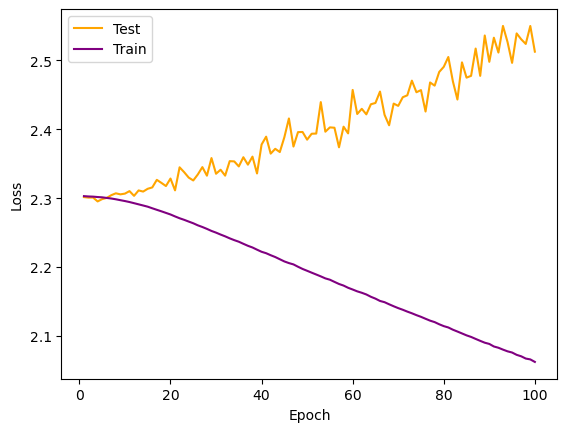

In [85]:
plt.plot(epoch_arr, test_loss_arr, color = "orange")
plt.plot(epoch_arr, train_loss_arr, color = "purple")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Test', 'Train'])
plt.show()

In [86]:
model_param = Model()
param = sum(p.numel() for p in model.parameters())
print(param)


51580
